In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"C:\Users\Acer\Downloads\Student Depression Dataset.csv",sep=",")


df.head()





,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [111]:
# Шаг 1: Проверяем пропущенные значения
data.isnull().sum()


id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [112]:
# Шаг 2: Обрабатываем пропущенные значения
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])




In [113]:
# Шаг 3: Исправляем типы данных
data['Age'] = data['Age'].astype(int)




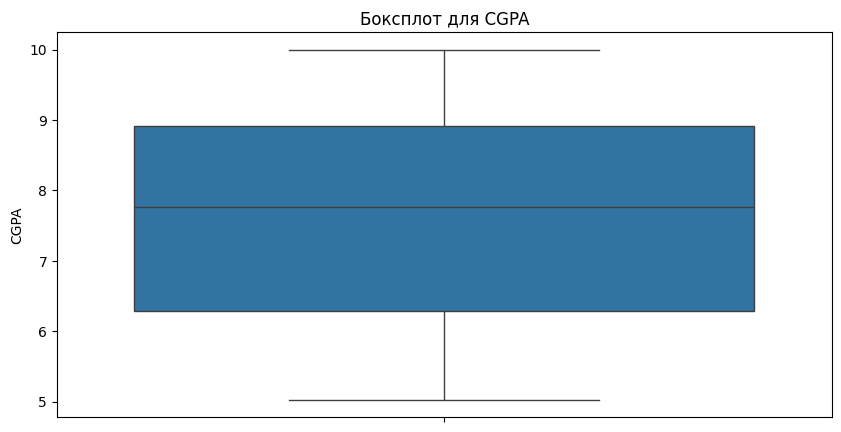

In [114]:
# Шаг 4: Выявляем и устраняем выбросы с помощью метода IQR
# Функция для удаления выбросов
def remove_outliers(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25) 
        Q3 = df[column].quantile(0.75) 
        IQR = Q3 - Q1                  
        lower_bound = Q1 - 1.5 * IQR    
        upper_bound = Q3 + 1.5 * IQR    
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
     
    return df, outliers

# Определяем столбцы с числовыми данными для проверки выбросов
numeric_outlier_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                           'Study Satisfaction', 'Job Satisfaction', 
                           'Work/Study Hours', 'Financial Stress']
data, outliers = remove_outliers(data, numeric_outlier_columns)

plt.figure(figsize=(10, 5))
sns.boxplot(data=data, y= 'CGPA')
plt.title(f'Боксплот для CGPA')
plt.ylabel('CGPA')
plt.show() 

In [115]:
# Шаг 5: Финальная проверка очищенных данных
cleaned_data_info = data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 27878 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27878 non-null  int64  
 1   Gender                                 27878 non-null  object 
 2   Age                                    27878 non-null  int64  
 3   City                                   27878 non-null  object 
 4   Profession                             27878 non-null  object 
 5   Academic Pressure                      27878 non-null  float64
 6   Work Pressure                          27878 non-null  float64
 7   CGPA                                   27878 non-null  float64
 8   Study Satisfaction                     27878 non-null  float64
 9   Job Satisfaction                       27878 non-null  float64
 10  Sleep Duration                         27878 non-null  object 
 11  Dietary

In [116]:
# Шаг 7: Описательная статистика для числовых признаков
numeric_stats = data[numeric_columns].describe().T  # Основные статистические показатели
print(numeric_stats)

# Дополнительно: рассчитываем моду для числовых признаков
numeric_stats['mode'] = data[numeric_columns].mode().iloc[0]
print(numeric_stats['mode'])



                      count          mean           std    min       25%  \
id                  27878.0  70442.056532  40640.340415   2.00  35040.75   
Age                 27878.0     25.811536      4.878066  18.00     21.00   
Academic Pressure   27878.0      3.142155      1.380840   0.00      2.00   
Work Pressure       27878.0      0.000000      0.000000   0.00      0.00   
CGPA                27878.0      7.658491      1.464565   5.03      6.29   
Study Satisfaction  27878.0      2.944401      1.360482   0.00      2.00   
Job Satisfaction    27878.0      0.000000      0.000000   0.00      0.00   
Work/Study Hours    27878.0      7.157795      3.707326   0.00      4.00   
Financial Stress    27878.0      3.139465      1.437357   1.00      2.00   
Depression          27878.0      0.585731      0.492604   0.00      0.00   

                         50%        75%       max  
id                  70697.00  105817.00  140699.0  
Age                    25.00      30.00      43.0  
Academi

In [123]:
# Шаг 8 Группировка данных по категории и анализ среднего значения депрессии
if data['Depression'].dtype.name == 'category':
    data['Depression'] = data['Depression'].cat.codes

grouped_data = data.groupby('Gender')['Depression'].mean()
grouped_data



Gender
Female    0.584704
Male      0.586547
Name: Depression, dtype: float64

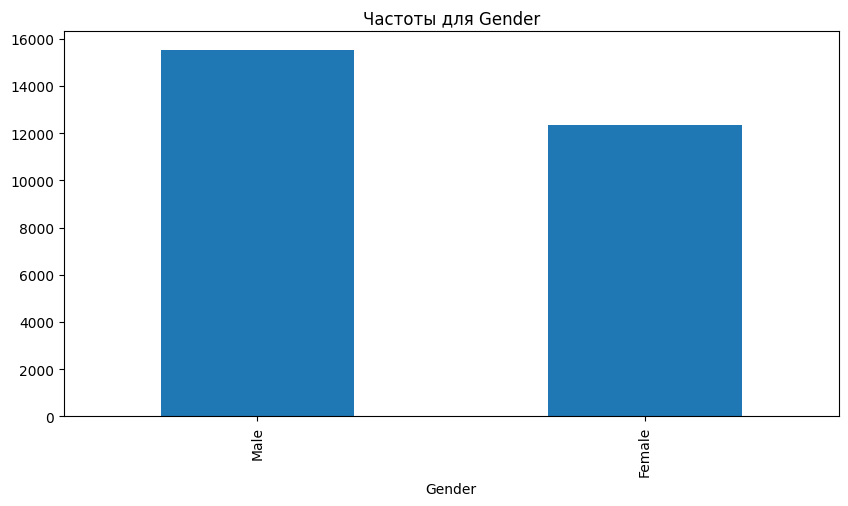

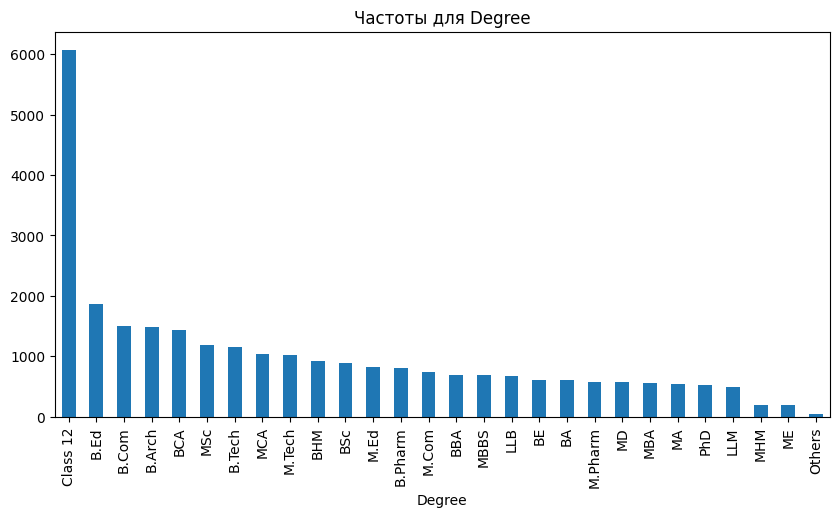

In [118]:
data['Gender'].value_counts().plot(kind='bar', title='Частоты для Gender', figsize=(10, 5))
plt.show()
data['Degree'].value_counts().plot(kind='bar', title='Частоты для Degree', figsize=(10, 5))
plt.show()



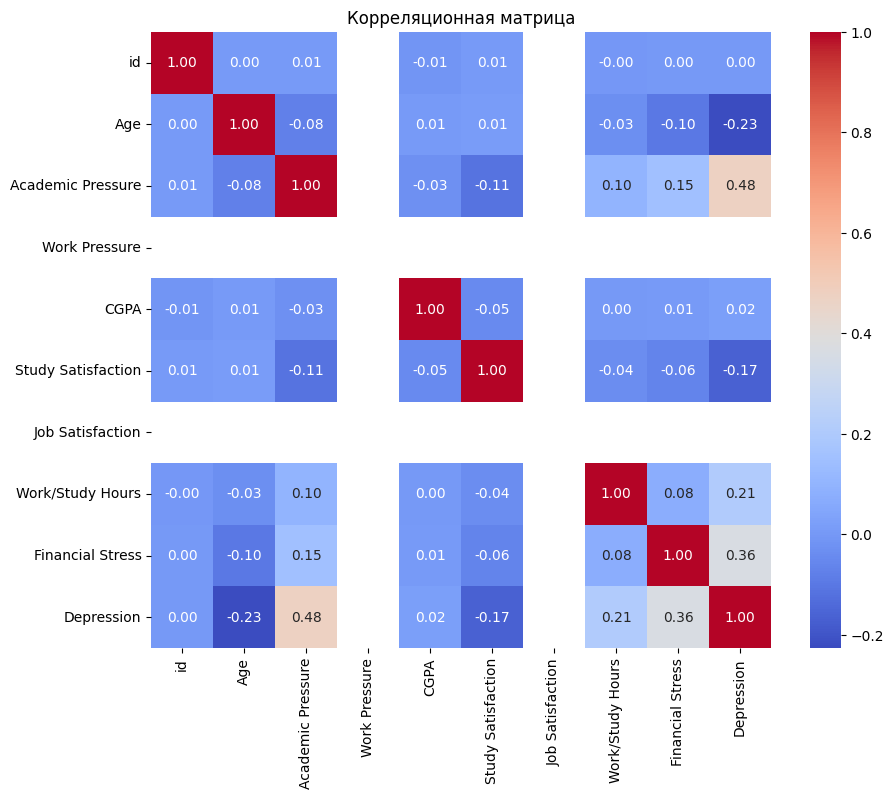

In [119]:
# Корреляционная матрица и тепловая карта
corr_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()


   Financial Stress Ratio Sleep Category
0                    0.25       Moderate
1                    0.50       Moderate
2                    0.10            Low
3                    1.00         Normal
4                    0.50       Moderate


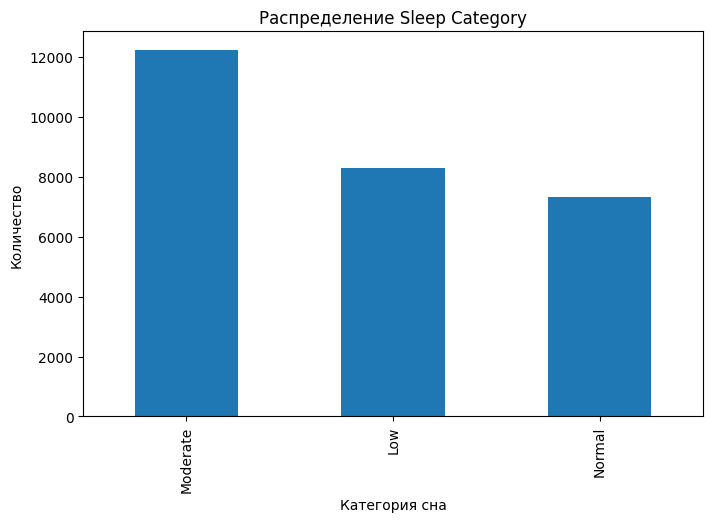

In [122]:
# Шаг 9: Создание новых признаков
# Создаем признак соотношения финансового стресса к часам учебы/работы
data['Financial Stress Ratio'] = data['Financial Stress'] / (data['Work/Study Hours'] + 1)
print(data[['Financial Stress Ratio', 'Sleep Category']].head())

# Создаем бинарный признак на основе количества часов сна
data['Sleep Category'] = data['Sleep Duration'].apply(lambda x: 'Low' if 'Less' in x else ('Normal' if '7-8' in x else 'Moderate'))
data['Sleep Category'].value_counts().plot(kind='bar', figsize=(8, 5))
plt.title('Распределение Sleep Category')
plt.xlabel('Категория сна')
plt.ylabel('Количество')
plt.show()



In [90]:
# Шаг 10: Фильтрация и сортировка данных
# Отбираем студентов с высоким уровнем академического давления
high_pressure_students = data[data['Academic Pressure'] > 4].sort_values(by='CGPA', ascending=False)
high_pressure_students


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Financial Stress Ratio,Sleep Category
24193,121769,Male,22,Kolkata,Student,5.0,0.0,10.00,3.0,0.0,More than 8 hours,Moderate,B.Com,Yes,8.0,5.0,No,1,0.555556,Moderate
3126,15800,Female,26,Patna,Student,5.0,0.0,10.00,1.0,0.0,More than 8 hours,Unhealthy,B.Pharm,Yes,6.0,5.0,Yes,1,0.714286,Moderate
3465,17340,Female,32,Kanpur,Student,5.0,0.0,10.00,2.0,0.0,7-8 hours,Healthy,BE,Yes,2.0,2.0,Yes,0,0.666667,Normal
7564,38077,Male,21,Hyderabad,Student,5.0,0.0,10.00,4.0,0.0,More than 8 hours,Unhealthy,MSc,Yes,5.0,5.0,Yes,1,0.833333,Moderate
13699,69366,Male,26,Indore,Student,5.0,0.0,10.00,4.0,0.0,Less than 5 hours,Unhealthy,B.Com,No,12.0,3.0,No,1,0.230769,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9401,47386,Female,32,Nashik,Student,5.0,0.0,5.06,1.0,0.0,Less than 5 hours,Moderate,Class 12,Yes,2.0,5.0,No,1,1.666667,Low
23457,118212,Male,32,Jaipur,Student,5.0,0.0,5.06,5.0,0.0,5-6 hours,Unhealthy,M.Tech,Yes,1.0,4.0,Yes,1,2.000000,Moderate
4060,20315,Female,20,Visakhapatnam,Student,5.0,0.0,5.06,1.0,0.0,7-8 hours,Unhealthy,Class 12,Yes,10.0,2.0,No,1,0.181818,Normal
4891,24501,Female,21,Pune,Student,5.0,0.0,5.06,4.0,0.0,5-6 hours,Moderate,MHM,Yes,5.0,3.0,Yes,1,0.500000,Moderate


In [88]:
# Шаг 11: Создание сводной таблицы
pivot_table = data.pivot_table(values='CGPA', index='Gender', columns='Sleep Category', aggfunc='mean')
pivot_table

Sleep Category,Low,Moderate,Normal
Gender,,,
Female,7.599272,7.605189,7.586755
Male,7.680214,7.685586,7.770548


In [89]:
# Шаг 12: Вывод результатов фильтрации, новых признаков и сводной таблицы
filtered_results = high_pressure_students[['id', 'Age', 'Academic Pressure', 'CGPA', 'Financial Stress Ratio', 'Sleep Category']]
filtered_results

,id,Age,Academic Pressure,CGPA,Financial Stress Ratio,Sleep Category
24193,121769,22,5.0,10.00,0.555556,Moderate
3126,15800,26,5.0,10.00,0.714286,Moderate
3465,17340,32,5.0,10.00,0.666667,Normal
7564,38077,21,5.0,10.00,0.833333,Moderate
13699,69366,26,5.0,10.00,0.230769,Low
...,...,...,...,...,...,...
9401,47386,32,5.0,5.06,1.666667,Low
23457,118212,32,5.0,5.06,2.000000,Moderate
4060,20315,20,5.0,5.06,0.181818,Normal
4891,24501,21,5.0,5.06,0.500000,Moderate
